# Overview
This data analytics project aims to understand and optimize the effectiveness of marketing campaigns using a dataset comprising various customer demographics, purchasing behaviors, and campaign responses. The dataset includes columns such as customer ID, year of birth, education level, marital status, income, number of children and teenagers at home, date of customer enrollment, recency of last purchase, spending on various product categories, number of purchases through different channels, campaign acceptance, and complaints.

# Objectives
The primary objectives of this project are to explore and identify key factors influencing customer responses to marketing campaigns and to analyze purchasing patterns. Specifically, the project will address the following questions:

1. Which demographic factors (age, eduaction, marital status, income) are most predictive of a positive campaign response?

2. How does the number of store purchases vary with income levels?
3. How do purchase patterns (web vs. store) change with the number of accepted campaigns?

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = 'marketing_campaign.csv'

In [15]:
df = pd.read_csv(data, sep = ';', header=None)

In [18]:
# Set column names
df.columns = df.iloc[0]
df = df[1:]

In [28]:
df['Dt_Customer']

1       2012-09-04
2       2014-03-08
3       2013-08-21
4       2014-02-10
5       2014-01-19
           ...    
2236    2013-06-13
2237    2014-06-10
2238    2014-01-25
2239    2014-01-24
2240    2012-10-15
Name: Dt_Customer, Length: 2240, dtype: object

### Data Cleaning and Preprocessing

In [31]:
df.head(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0


Convert columns into appropriate type and format

In [29]:
# Set ID as index
df.set_index('ID', inplace=True)

# Convert data columns to numeric
columns_to_convert = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
                      'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                      'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                      'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
                      'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
                      'Z_Revenue', 'Response']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Convert Year_Birth and Dt_Customer to datetime
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


Replace missing values

In [35]:
# Replace Income missing values with Income mean based on Education
df['Income'] = df.groupby('Education')['Income'].transform(lambda x: x.fillna(x.mean()))

Create derived columns

In [39]:
# Customer Age
df['Age'] = 2024 - df['Year_Birth'].dt.year

### Exploratory Data Analysis

Visualize key variables such as income, age, and spending patterns

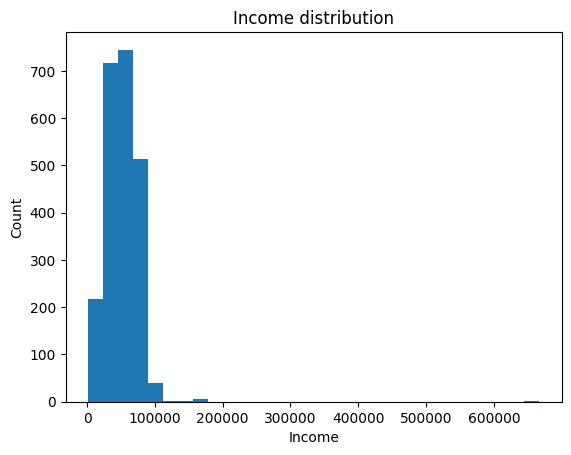

In [51]:
plt.hist(df['Income'], bins=30)
plt.title('Income distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

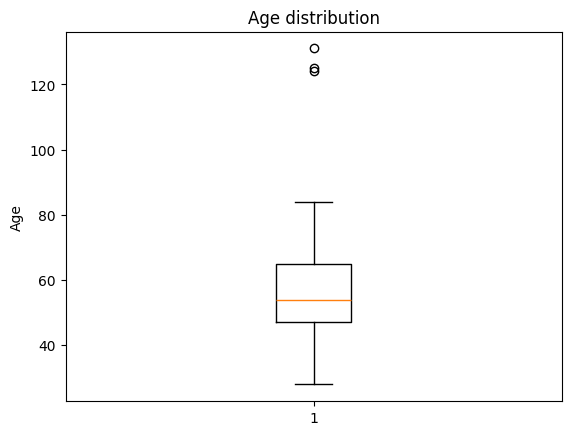

In [52]:
plt.boxplot(df['Age'])
plt.title('Age distribution')
plt.ylabel('Age')
plt.show()

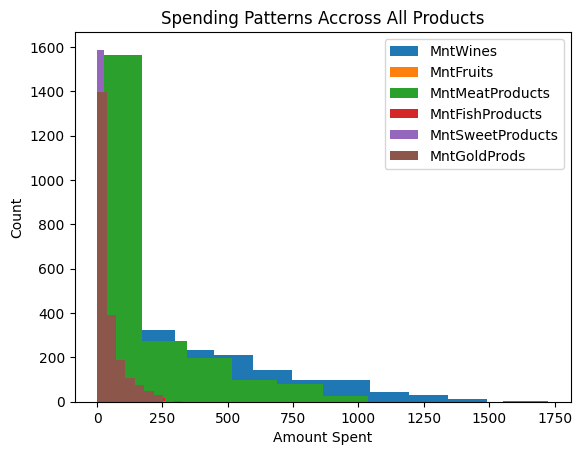

In [73]:
# List of product columns
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Plot distribution of products
for product in product_cols:
    plt.hist(df[product], bins=10, label=product)

plt.title('Spending Patterns Accross All Products')
plt.xlabel('Amount Spent')
plt.ylabel('Count')
plt.legend()
plt.show()

Analyze correlations between demographic factors and campaign responses

In [75]:
# One-hot encode Education and Marital_Status columns
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'])

In [82]:
# Pearson Correlation

demo_factor = df[['Age', 'Income'] + [col for col in df.columns if col.startswith('Education_') or col.startswith('Marital_Status_')]]

camp_responses = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

correlation_results = {}
for response in camp_responses.columns:
    correlation_results[response] = demo_factor.corrwith(df[response])


correlation_results

{'AcceptedCmp1': Age                        0.005930
 Income                     0.274909
 Education_2n Cycle         0.006024
 Education_Basic           -0.041196
 Education_Graduation       0.034767
 Education_Master          -0.028360
 Education_PhD             -0.005489
 Marital_Status_Absurd      0.053108
 Marital_Status_Alone      -0.009599
 Marital_Status_Divorced   -0.017409
 Marital_Status_Married     0.027885
 Marital_Status_Single      0.000634
 Marital_Status_Together   -0.021964
 Marital_Status_Widow       0.000500
 Marital_Status_YOLO       -0.007836
 dtype: float64,
 'AcceptedCmp2': Age                        0.006539
 Income                     0.087504
 Education_2n Cycle        -0.009724
 Education_Basic           -0.018312
 Education_Graduation       0.007039
 Education_Master          -0.030909
 Education_PhD              0.032894
 Marital_Status_Absurd     -0.003483
 Marital_Status_Alone      -0.004267
 Marital_Status_Divorced    0.024126
 Marital_Status_Married   

**Correlations Summary**

- Income: Consistently shows a positive correaltion with campaign acceptance, with higher income leading to higher acceptance rate.

- Age: Weak correlations indicate minor influence on acceptance rates, with mixed directions depending on the campaign.
- Education: Higher education levels like PhD show slight positive correlations in some campaigns.
- Marital Status: Single and divorced individuals show higher acceptance rates, while married individuals often show lower acceptance.

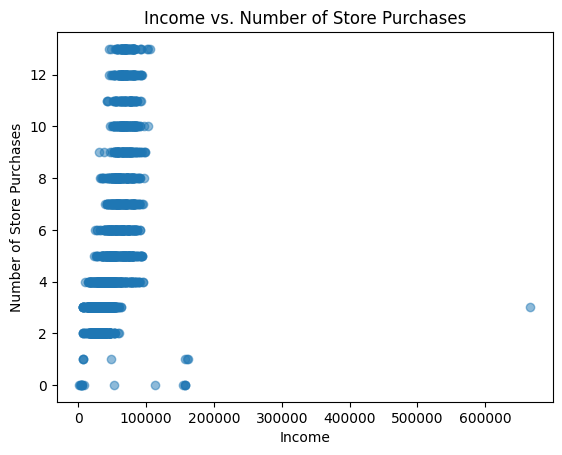

Correlation between Income and Number of Store Purchases: 0.5266474955976675


In [83]:
# Scatter plot of Income vs. NumStorePurchases
plt.scatter(df['Income'], df['NumStorePurchases'], alpha=0.5)
plt.title('Income vs. Number of Store Purchases')
plt.xlabel('Income')
plt.ylabel('Number of Store Purchases')
plt.show()

cor = df['Income'].corr(df['NumStorePurchases'])
print(f'Correlation between Income and Number of Store Purchases: {cor}')

There is a noticeable positive relationship between income and the number of store purchases. Customers with higher income levels are more likely to make more purchases in-store.

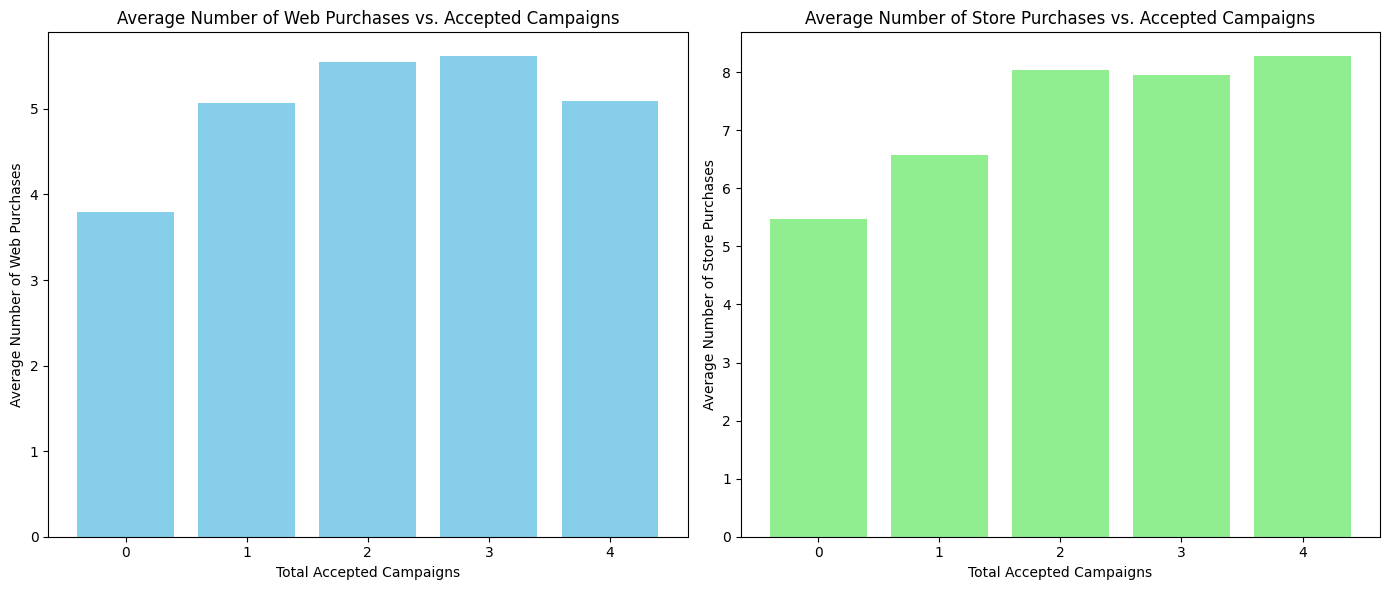

In [86]:
df['Accepted_Campaigns'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

purchase_patterns = df.groupby('Accepted_Campaigns')[['NumStorePurchases', 'NumWebPurchases']].mean().reset_index()

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for Web Purchases
ax[0].bar(purchase_patterns['Accepted_Campaigns'], purchase_patterns['NumWebPurchases'], color='skyblue')
ax[0].set_title('Average Number of Web Purchases vs. Accepted Campaigns')
ax[0].set_xlabel('Total Accepted Campaigns')
ax[0].set_ylabel('Average Number of Web Purchases')

# Bar plot for Store Purchases
ax[1].bar(purchase_patterns['Accepted_Campaigns'], purchase_patterns['NumStorePurchases'], color='lightgreen')
ax[1].set_title('Average Number of Store Purchases vs. Accepted Campaigns')
ax[1].set_xlabel('Total Accepted Campaigns')
ax[1].set_ylabel('Average Number of Store Purchases')

plt.tight_layout()
plt.show()

Both web and store purchases generally increase with the number of accepted campaigns, indicating that customers who accept more campaigns are more engaged and make more purchases.

The increase in web purchases is noticeable up to 3 accepted campaigns, after which there is a slight decline. This suggests a strong engagement online up to a certain point.

There is a clear increase in store purchases as more campaigns are accepted. This suggests strong and sustained engagement in physical stores for customers who are more receptive to campaigns.
